pygame 2.4.0 (SDL 2.26.4, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 2/2 [00:16<00:00,  8.13s/it]


(<Figure size 640x480 with 1 Axes>, <Axes: >)

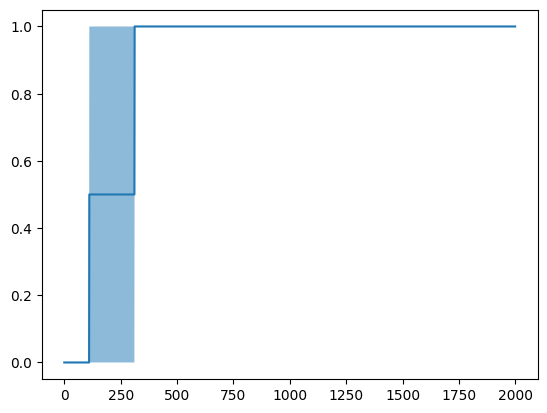

In [1]:


# Training a Q learner initialized on a potential.
import gymnasium as gym
import reward_shaping as rs
import numpy as np
from collections import defaultdict

big_lake_params = {
    "env_id": "FrozenLake-v1",
    "env_options": {
        "desc": None,
        "is_slippery": False,
        "map_name": "8x8",
    },
}

big_q_learner_params = {
    "lr": 0.7,
    "eps_init": 1,
    "eps_final": 0.1,
    "eps_decay": 0.0005,
    "discount": 0.95,
    "action_space": gym.spaces.Discrete(4),
}

LARGE_MAP_SIZE = 8
LARGE_EPISODES = 2000
RUNS = 2

def frozen_potential_function(map_size: int, discount: float) -> callable:
    def thunk(s):
        distance_to_goal = abs(s // map_size - (map_size - 1)) + abs(
            (s % map_size) - (map_size - 1)
        )
        return discount**distance_to_goal

    return thunk


# Setup experiment
exp = rs.Experiment(
    "ExampleLargeLakeQInitTEST", **big_lake_params, q_learner_params=big_q_learner_params
)

# Create initial qtable based on potential
qtable_init = defaultdict(lambda: np.ones(4))
frozen_potential_big = frozen_potential_function(
    LARGE_MAP_SIZE, big_q_learner_params["discount"] / 2
)
for s in range(LARGE_MAP_SIZE**2):
    qtable_init[s] = qtable_init[s] * frozen_potential_big(s)

# Initialize qtable for experiment
exp.set_initial_qtable(qtable_init)

# Run experiment and plot evaluations
exp.run(runs=RUNS, episodes_per_run=LARGE_EPISODES)
exp.plot_evals()